**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df_2cweka = pd.read_csv('2Classdata.csv')
df_2cweka.sample(n=5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
127,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,Abnormal
27,43.580964,16.508884,47.000000,27.072080,109.271634,8.992816,Abnormal
289,44.430701,14.174264,32.243495,30.256437,131.717613,-3.604255,Normal
296,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980,Normal
185,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df_2cweka.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df_2cweka.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df_2cweka)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [6]:
df_2cweka['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

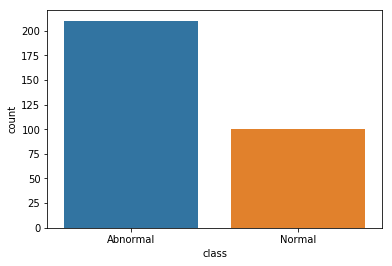

In [7]:
sns.countplot(x="class", data=df_2cweka)

In [8]:
df_2cweka.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [9]:
df_2cweka.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [10]:
df_2cweka.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

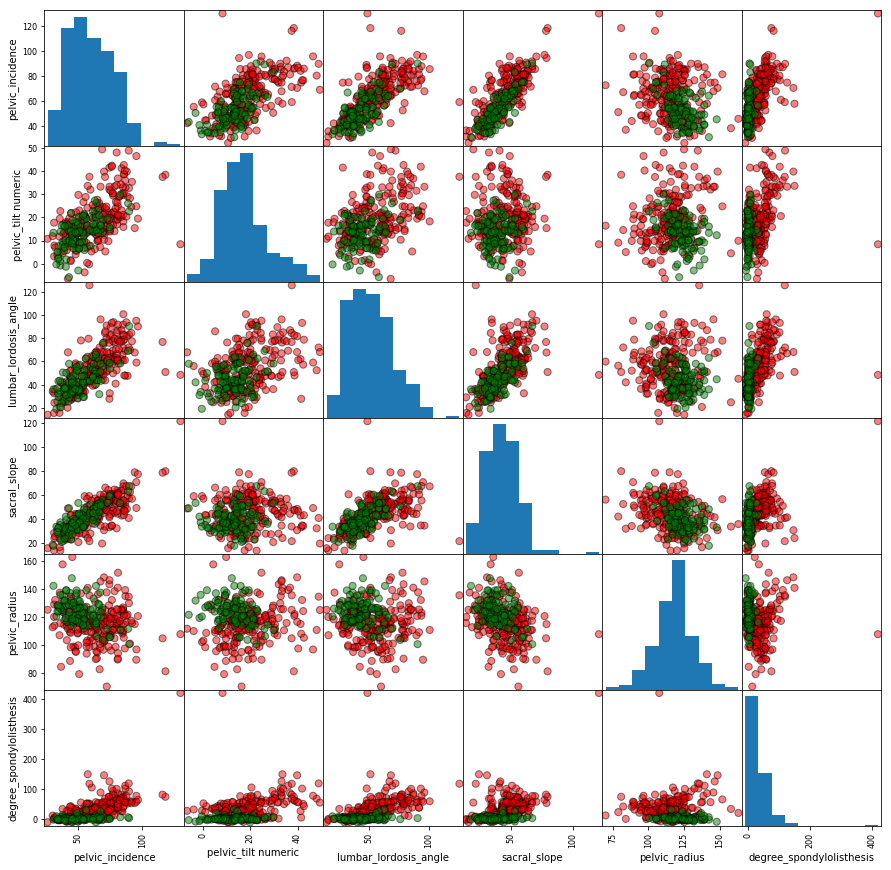

In [11]:
color_list = ['red' if i=='Abnormal' else 'green' for i in df_2cweka.loc[:,'class']]
pd.plotting.scatter_matrix(df_2cweka.loc[:, df_2cweka.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

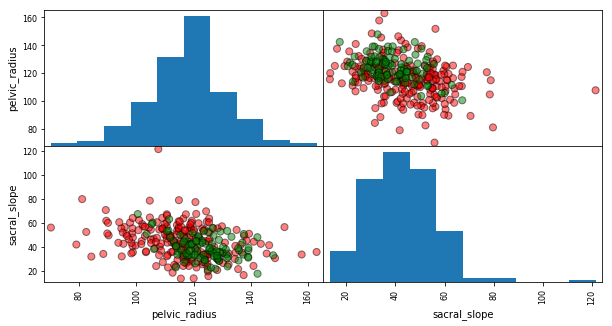

In [12]:
df_2cweka_sub = df_2cweka[['pelvic_radius','sacral_slope','class']]
color_list = ['red' if i=='Abnormal' else 'green' for i in df_2cweka_sub.loc[:,'class']]
pd.plotting.scatter_matrix(df_2cweka_sub.loc[:, df_2cweka_sub.columns != 'class'],
                                       c=color_list,
                                       figsize= [10,5],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

# Encode the Class variable to integer.

In [13]:
label_encoder = LabelEncoder()
df_2cweka['class'] = label_encoder.fit_transform(df_2cweka['class'])
df_2cweka.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
111,84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,0
237,62.140805,13.960975,58.000000,48.179830,133.281834,4.955106,1
188,85.680950,38.650035,82.680977,47.030914,120.840707,61.959034,0
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0
232,43.117951,13.815744,40.347388,29.302207,128.517722,0.970926,1
30,50.819268,15.402213,42.528939,35.417055,112.192804,10.869566,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1
158,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,0
216,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,1
245,47.805559,10.688698,54.000000,37.116861,125.391138,-0.402523,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [14]:
x,y = df_2cweka.loc[:,df_2cweka.columns != 'class'], df_2cweka.loc[:,'class']

In [15]:
print(df_2cweka.shape)
print(x.shape)
print(y.shape)

(310, 7)
(310, 6)
(310,)


# Normalize your Data (X) to get values between 0 to 1.

In [16]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x)
X_train_minmax

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X_train_minmax,y,test_size = 0.3,random_state = 1)

In [18]:
print(x_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [20]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [21]:
knn.score(x_test, y_test)

0.7526881720430108

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

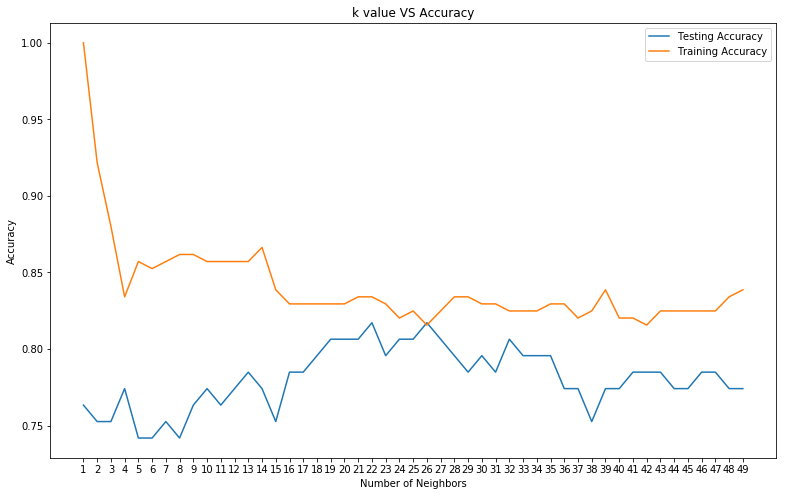

Best accuracy is 0.8172043010752689 with K = 22


In [22]:
# Model complexity
neig = np.arange(1, 50)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [23]:
df_3cweka = pd.read_csv('3Classdata.csv')
df_3cweka.sample(n=5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
273,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,Normal
120,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,Spondylolisthesis
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,Normal
292,34.756738,2.631740,29.504381,32.124998,127.139850,-0.460894,Normal
275,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,Normal


In [24]:
df_3cweka.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [25]:
df_3cweka.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [26]:
nans(df_3cweka)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [27]:
df_3cweka['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

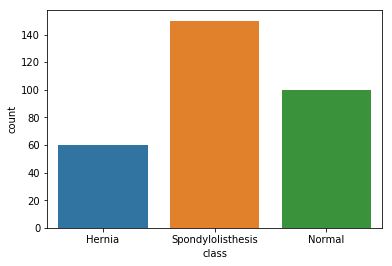

In [28]:
sns.countplot(x="class", data=df_3cweka)

In [29]:
df_3cweka.loc[:,'class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [30]:
df_3cweka.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [31]:
df_3cweka.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

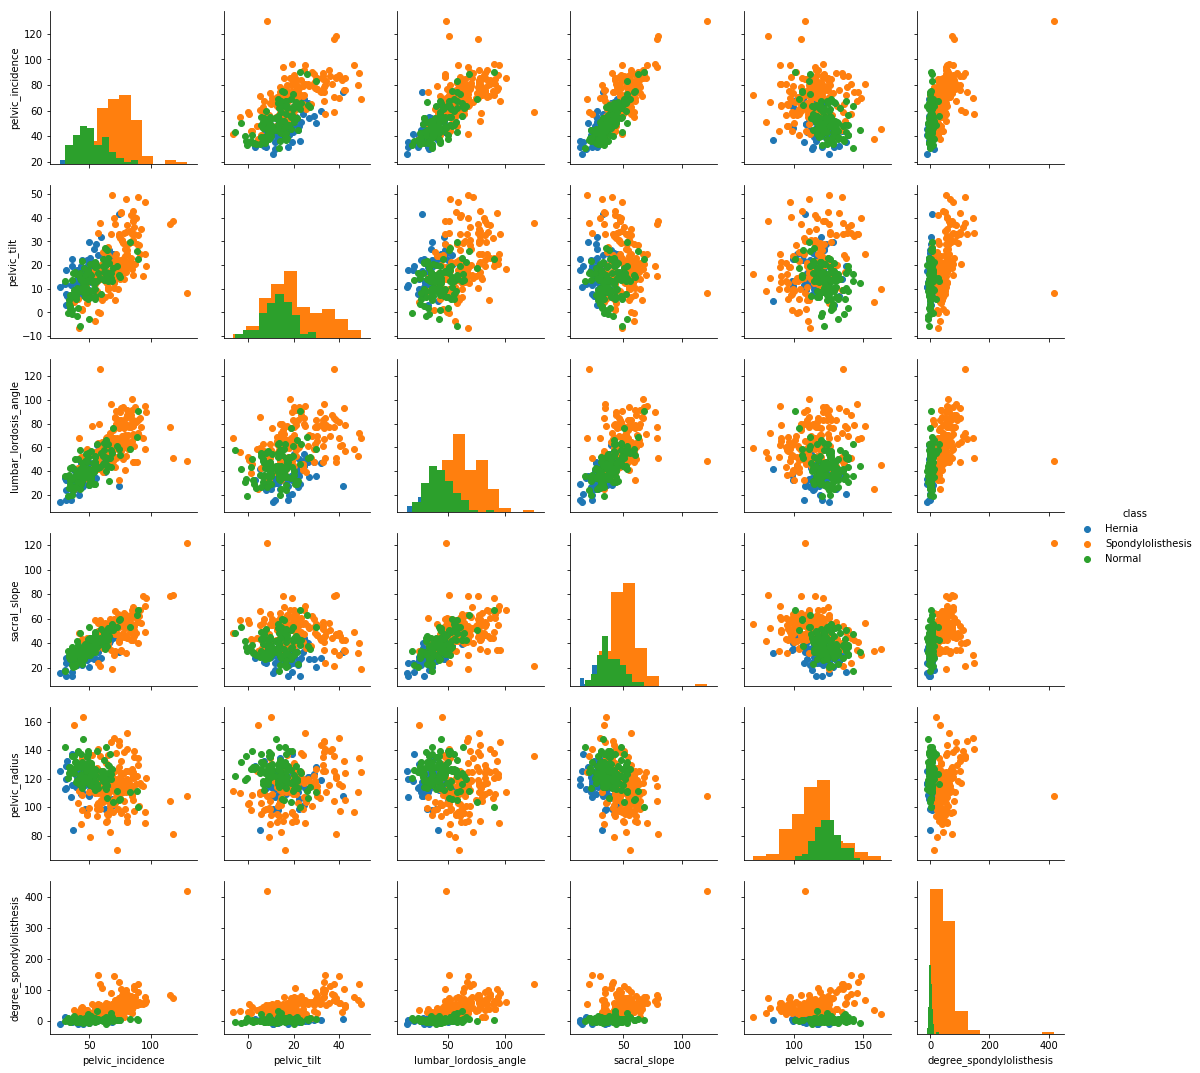

In [32]:
g = sns.PairGrid(df_3cweka, hue="class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

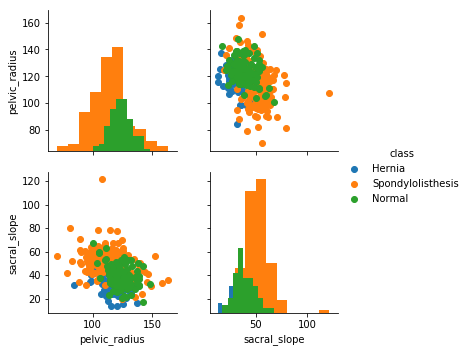

In [33]:
g = sns.PairGrid(df_3cweka[['pelvic_radius','sacral_slope','class']], hue="class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [34]:
df_3cweka['class'] = label_encoder.fit_transform(df_3cweka['class'])
df_3cweka.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
96,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,2
253,63.792425,21.345323,66.000000,42.447102,119.550391,12.382604,1
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,1
227,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031,1
165,83.703177,20.268229,77.110598,63.434949,125.480174,69.279571,2
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,2
243,34.649922,7.514783,43.000000,27.135140,123.987741,-4.082938,1
83,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,2
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,1
90,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,2


In [35]:
x_3,y_3 = df_3cweka.loc[:,df_3cweka.columns != 'class'], df_3cweka.loc[:,'class']
print(df_3cweka.shape)
print(x_3.shape)
print(y_3.shape)

(310, 7)
(310, 6)
(310,)


In [36]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_3)
X_train_minmax

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_train_minmax,y,test_size = 0.3,random_state = 1)

In [38]:
print(x_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


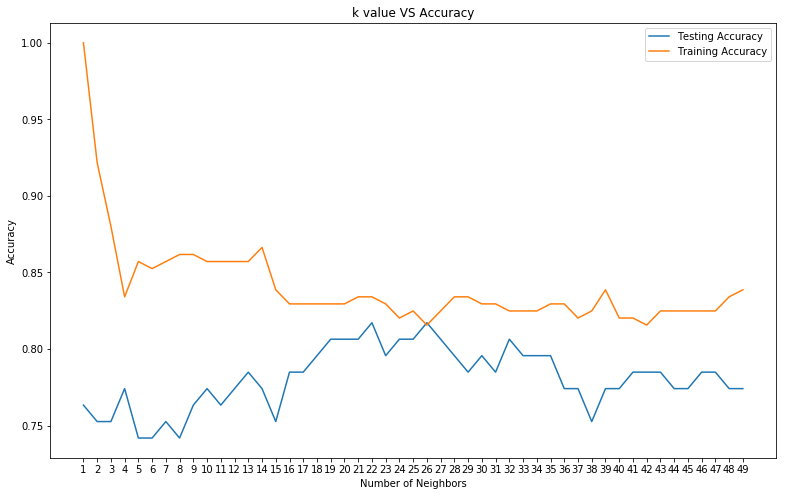

Best accuracy is 0.8172043010752689 with K = 22


In [42]:
# Model complexity
neig = np.arange(1, 50)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))